## Configuration

In [1]:
# Data management
import pandas as pd


# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.49)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})

## Use case 1. Mesh times

In [2]:
times = pd.read_csv('big_mesh_times.txt', sep=";", header=None)
times.columns = ["number_nodes","start","end","mesh_time"]

In [3]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby('number_nodes')['mesh_time'].apply(is_outlier)]

In [4]:
times.groupby('number_nodes').describe()

mesh_time                                                      \
                 count       mean       std       min       25%        50%   
number_nodes                                                                 
5                 16.0   0.921465  0.006014  0.912752  0.917321   0.919992   
10                18.0   1.017356  0.007433  1.001793  1.014061   1.016646   
15                17.0   1.162400  0.047173  1.121748  1.135283   1.141429   
20                18.0   1.327811  0.030267  1.258230  1.314313   1.320805   
25                19.0   1.582754  0.023142  1.542967  1.568615   1.586214   
30                19.0   2.355007  0.057084  2.271753  2.320486   2.343619   
35                17.0   2.740688  0.086757  2.654489  2.685326   2.706499   
40                18.0   3.073364  0.029796  3.019358  3.060914   3.072794   
45                17.0   3.597261  0.064145  3.506545  3.565968   3.575979   
50                20.0   4.231792  0.134717  4.102088  4.137097   4.177322   
55                20.0   5.236619  0.184398  5.004883  5.061500   5.249431   
60                20.0   5.810423  0.100213  5.675707  5.739198   5.780088   
65                19.0   6.655103  0.181532  6.404252  6.494442   6.583518   
70                20.0   7.464068  0.163512  7.279736  7.347157   7.412073   
75                20.0   8.593097  0.231032  8.158976  8.415840   8.615719   
80                19.0  10.021258  0.339856  9.526328  9.670188  10.045267   

                                    
                    75%        max  
number_nodes                        
5              0.925511   0.934839  
10             1.023306   1.028713  
15             1.179047   1.299899  
20             1.350382   1.397729  
25             1.595900   1.624296  
30             2.391128   2.483785  
35             2.764168   2.983820  
40             3.091513   3.147202  
45             3.626225   3.773919  
50             4.287736   4.497211  
55             5.334732   5.703632  
60             5.870174   6.039229  
65             6.797510   6.959360  
70             7.563977   7.781030  
75             8.727855   8.995079  
80            10.318129  10.543178

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

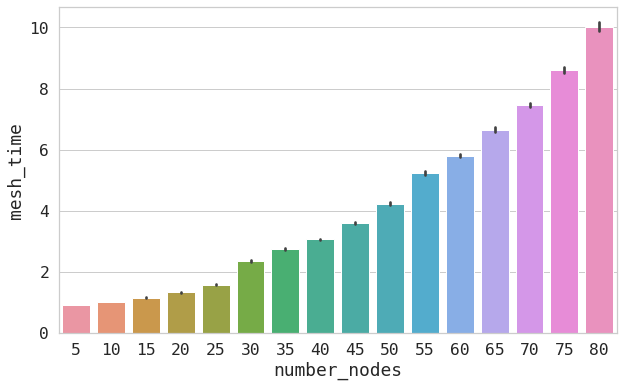

In [5]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.barplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

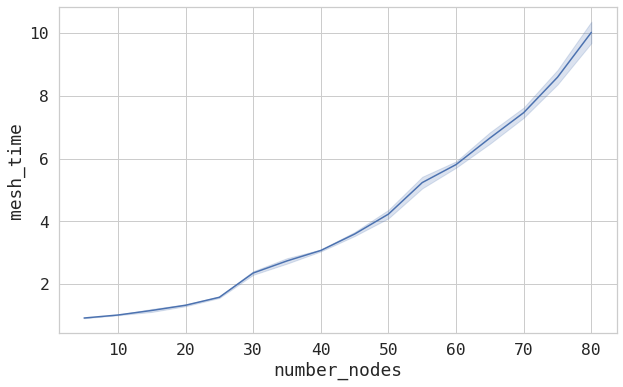

In [6]:
# mean lineplot with std
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(x='number_nodes',
             y='mesh_time',
             data=times,
             err_style="band",
             ci='sd',
             ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

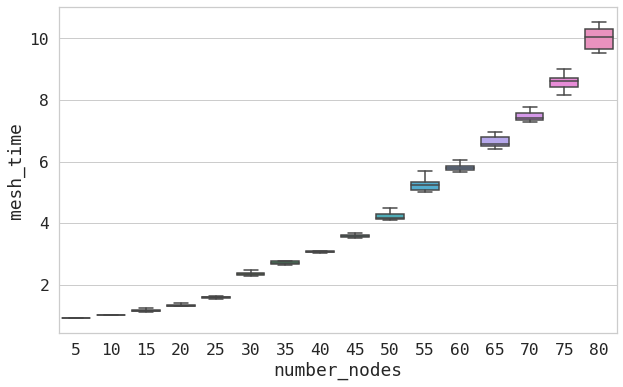

In [7]:
# boxplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='number_nodes',
            y='mesh_time',
            data=times,
            showfliers=False)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

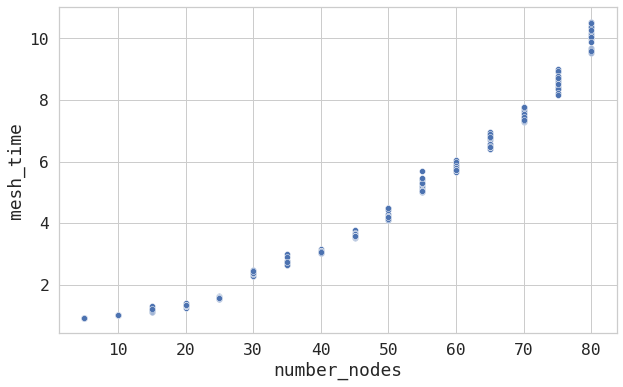

In [8]:
# points of each experiment
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(x='number_nodes',
            y='mesh_time',
            data=times)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

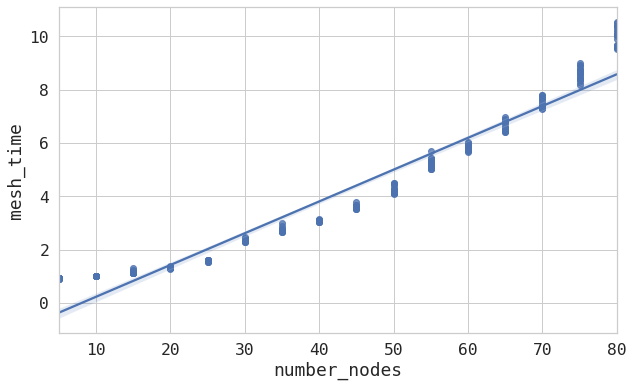

In [9]:
# linear regression
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

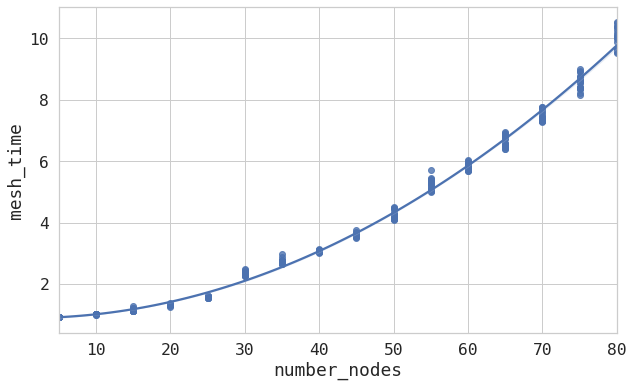

In [10]:
# polynomial regression of order 2
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            order=2,
            ax=axs)

## Use case 2. Resizing times

### with exponentially-generated values

In [12]:
times = pd.read_csv('resizing_times.txt', sep=";", header=None)
times.columns = ["arrival_time","ith_node","start","end","service_time"]
#times = times.replace({-1:'continuous'})

In [13]:
times.head()

,arrival_time,ith_node,start,end,service_time
0,0.25,1,00:24:49.029426,00:24:49.887133,0.857707
1,0.25,2,00:24:49.718126,00:24:50.679100,0.960974
2,0.25,3,00:24:51.495845,00:24:52.523112,1.027267
3,0.25,4,00:24:52.133311,00:24:53.195105,1.061794
4,0.25,5,00:24:48.187097,00:24:49.079106,0.892009


In [14]:
times.arrival_time.unique()

array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  5.  , 10.  , -1.  ])

In [15]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby(['arrival_time','ith_node'])['service_time'].apply(is_outlier)]

In [16]:
times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5826 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  5826 non-null   float64
 1   ith_node      5826 non-null   int64  
 2   start         5826 non-null   object 
 3   end           5826 non-null   object 
 4   service_time  5826 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 273.1+ KB


In [17]:
x='ith_node'
y='service_time'
hue='arrival_time'

(0.0, 1.2237870000000002)

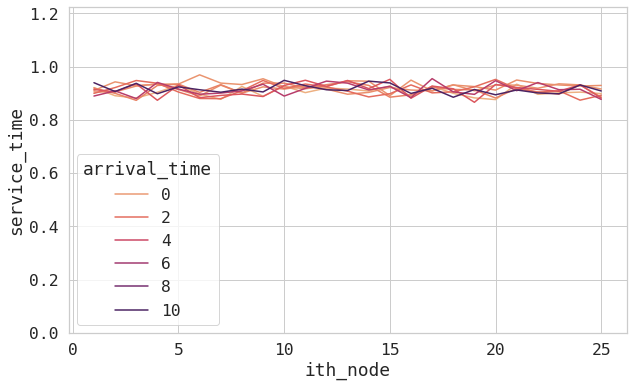

In [32]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=times,
             x=x,
             y=y,
             hue=hue,
             palette="flare",
             ci=None,
             ax=axs)
plt.ylim(0,max(times[y]))

(0.0, 1.2237870000000002)

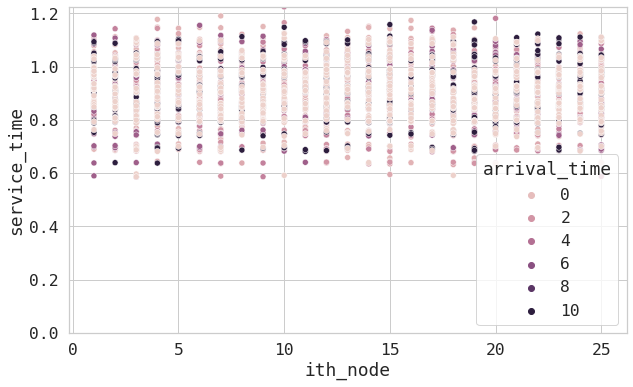

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(data=times,
             x=x,
             y=y,
             hue=hue,
             ax=axs)
plt.ylim(0,max(times[y]))

(0.0, 1.2237870000000002)

<Figure size 864x576 with 0 Axes>

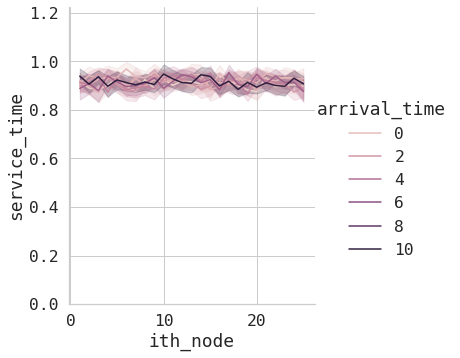

In [34]:
fig = plt.figure(figsize=(12,8))
sns.relplot(data=times,
             x=x,
             y=y,
             hue=hue,
             kind='line')
plt.ylim(0,max(times[y]))

(0.0, 1.2237870000000002)

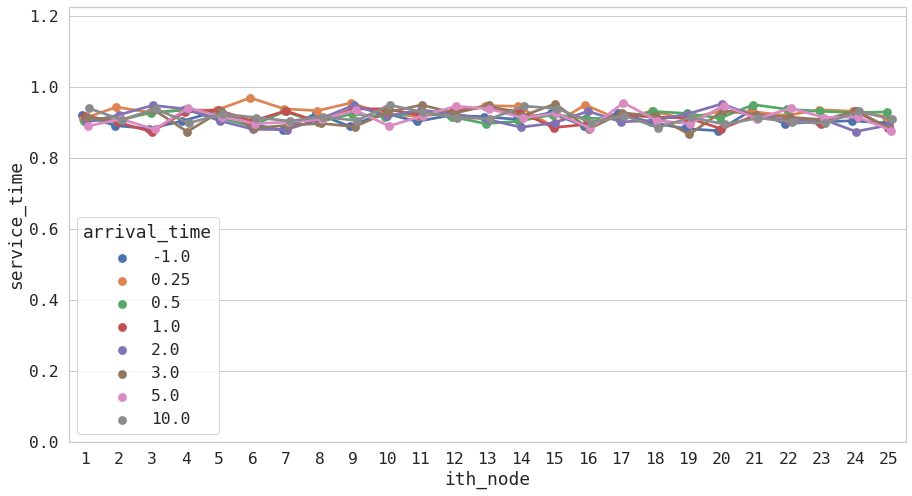

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            hue=hue,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
             ci=None)
plt.ylim(0,max(times[y]))

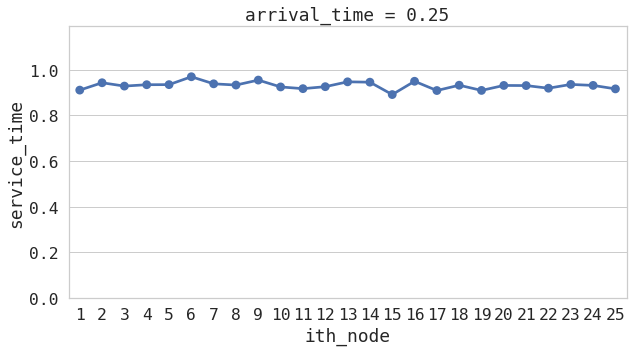

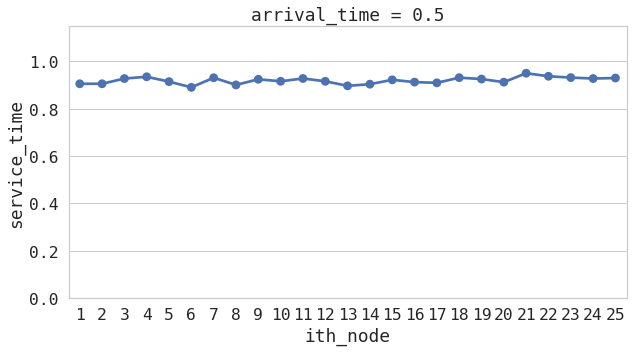

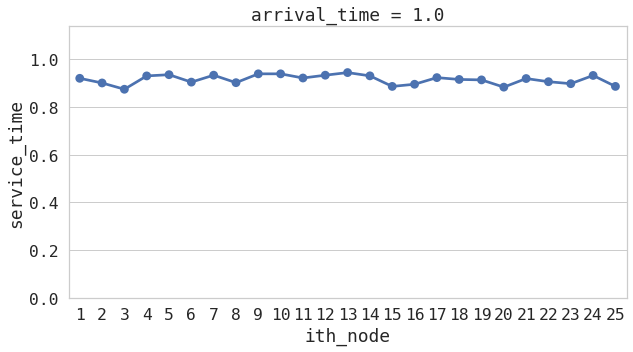

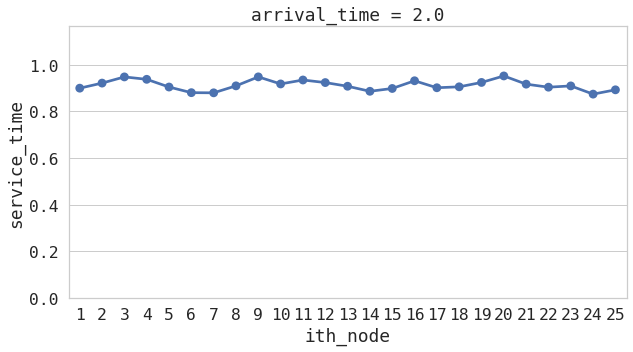

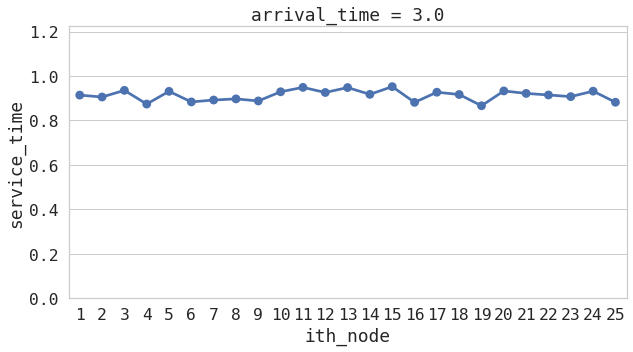

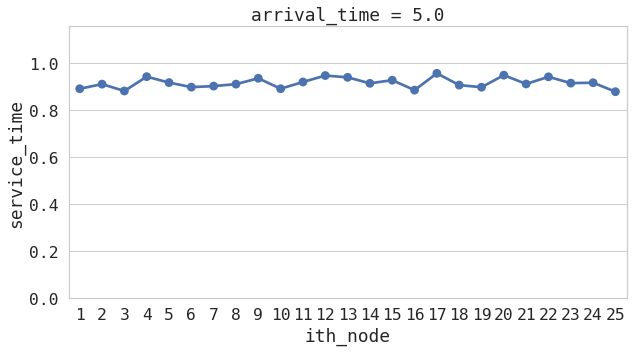

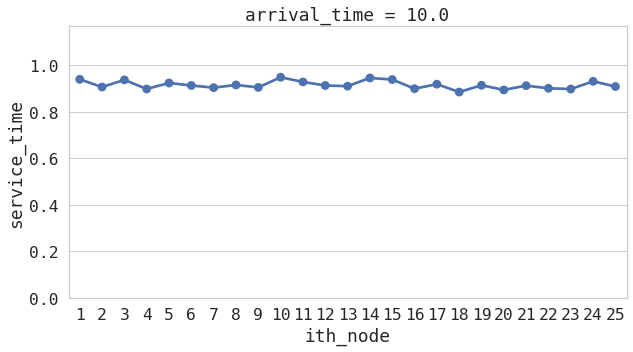

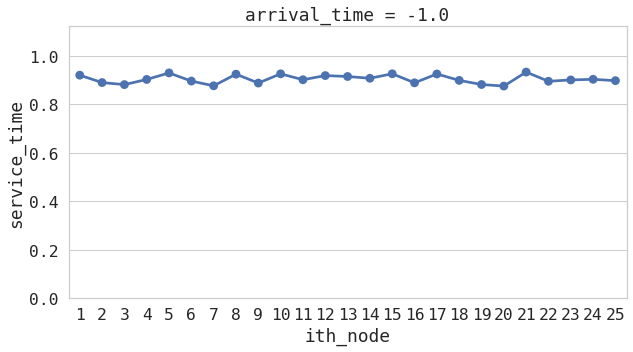

In [36]:
for arrival_time in times.arrival_time.unique():
    fig, axs = plt.subplots(1, 1, figsize=(10,5))
    sns.pointplot(x=x,
                y=y,
                data=times[times.arrival_time==arrival_time],
                ax=axs,
                legend_out=True,
                dodge=True,
                ci=None)
    plt.title("arrival_time = " + str(arrival_time))
    plt.ylim(0,max(times[times.arrival_time==arrival_time][y]))
    plt.show()

(0.0, 1.2237870000000002)

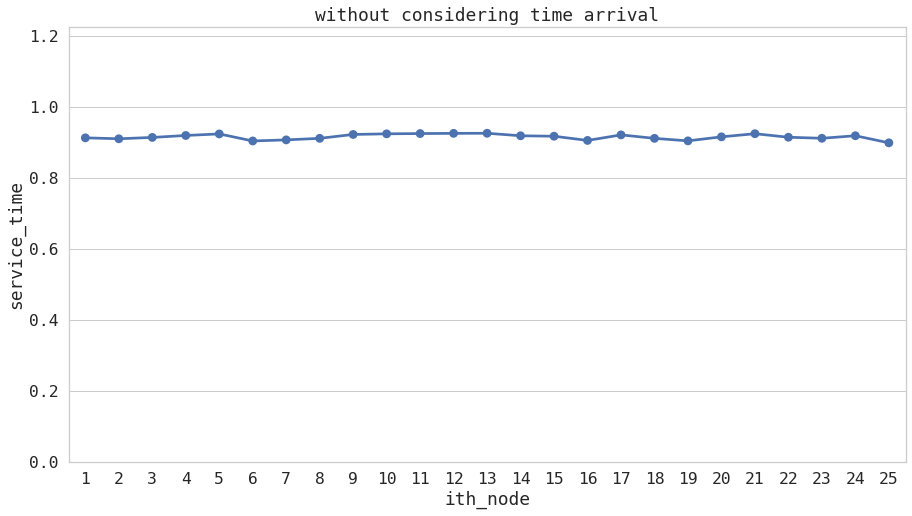

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
            ci=None)

plt.title("without considering time arrival")
plt.ylim(0,max(times[y]))